In [1]:
# import all packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from pathlib import Path
ROOT_NOTEBOOK = Path.cwd()
PATH_UTILS = ROOT_NOTEBOOK / 'utils'
PATH_COCOAPI = ROOT_NOTEBOOK / 'dataset/cocoapi'

from utilities import helpers
from utilities import COCOKeypoint

import torch
from torch.utils.data import DataLoader
from torchvision.models.detection import keypointrcnn_resnet50_fpn
from torchvision.models.detection import KeypointRCNN_ResNet50_FPN_Weights as Weights

In [2]:
# print directory information
pd.Series(
    {
        'ROOT of NOTEBOOK' : ROOT_NOTEBOOK, # folder of the notebook
        'PATH of UTILITY PACKAGE' : PATH_UTILS,  # folder of the utility function
        'PATH of COCOAPI' : PATH_COCOAPI, # folder of the cocoapi
    }
).to_frame().style.hide(axis = 'columns').set_properties(**{'text-align' : 'left'})

ROOT of NOTEBOOK,/home/xzh/dev/DL/human_pose_estimation
PATH of UTILITY PACKAGE,/home/xzh/dev/DL/human_pose_estimation/utils
PATH of COCOAPI,/home/xzh/dev/DL/human_pose_estimation/dataset/cocoapi


In [3]:
# root of the COCO dataset
ROOT = Path().cwd() / "dataset/coco2017"

# directory of the train set
TRAIN_IMAGES_PATH = str(ROOT / "train2017")
# directory of the annotation (.json) file for train set
TRAIN_ANNOTATIONS_PATH = str(ROOT / "annotations/person_keypoints_train2017.json")

# directory of the validation set
VAL_IMAGES_PATH = str(ROOT / "val2017")
# directory of the annotation (.json) file for the validation set
VAL_ANNOTATIONS_PATH = str(ROOT / "annotations/person_keypoints_val2017.json")

# print info
pd.Series(
    {
        'ROOT' : ROOT,
        'TRAIN_IMAGES_PATH' : TRAIN_IMAGES_PATH,
        'TRAIN_ANNOTATIONS_PATH' : TRAIN_ANNOTATIONS_PATH,
        'VAL_IMAGES_PATH' : VAL_IMAGES_PATH,
        'VAL_ANNOTATIONS_PATH' : VAL_ANNOTATIONS_PATH
    }
).to_frame().style.hide(axis = 'columns').set_properties(**{'text-align' : 'left'})

ROOT,/home/xzh/dev/DL/human_pose_estimation/dataset/coco2017
TRAIN_IMAGES_PATH,/home/xzh/dev/DL/human_pose_estimation/dataset/coco2017/train2017
TRAIN_ANNOTATIONS_PATH,/home/xzh/dev/DL/human_pose_estimation/dataset/coco2017/annotations/person_keypoints_train2017.json
VAL_IMAGES_PATH,/home/xzh/dev/DL/human_pose_estimation/dataset/coco2017/val2017
VAL_ANNOTATIONS_PATH,/home/xzh/dev/DL/human_pose_estimation/dataset/coco2017/annotations/person_keypoints_val2017.json


In [4]:
train_dataset = COCOKeypoint.COCOKeypoint(
                                TRAIN_IMAGES_PATH, # path of train images
                                TRAIN_ANNOTATIONS_PATH, # path of annotation file
                                is_cropped=True, # crop images
                                crop_size=512, # crop size 
                                is_grayscale=True # convert to grayscale
)
print(f'The number of samples in training set: {len(train_dataset)}')

loading annotations into memory...
Done (t=3.04s)
creating index...
index created!
The number of samples in training set: 64115


In [5]:
# randomly choose one sample in the train set
train_sample_index = np.random.randint(0, len(train_dataset))
print(f'Index of sample in train set: {train_sample_index}')

# fetch sample image and annotations
train_sample_image, train_sample_annotations = train_dataset[train_sample_index]
# print(train_sample_annotations)

Index of sample in train set: 42345


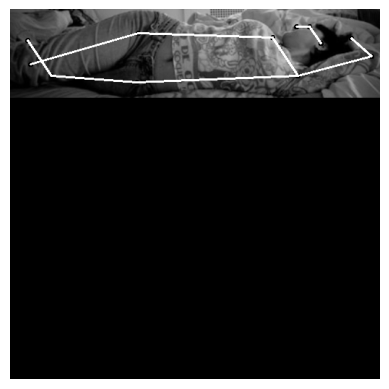

In [6]:
if (train_sample_image is not None) and (train_sample_annotations is not None):
    # if both train_sample_image and train_sample_annotations are effective
    # annotate sample image with keypoints
    train_sample_images_with_keypoints = helpers.draw_keypoints(train_sample_annotations, train_sample_image)

    # show the result
    plt.figure()
    plt.imshow(train_sample_images_with_keypoints, cmap='gray')
    plt.axis('off')
    plt.show()
    
else:
    # if data is not efective
    # print the info
    print(f'Non-effective data for {train_sample_index}-th sample')

In [7]:
# create a dataloader with batch_size
# function collate_fn used to filter invalid data out
train_dataloader = DataLoader(train_dataset, batch_size = 5, collate_fn=helpers.collate_fn)

In [8]:
train_id, train_batch_data = next(enumerate(train_dataloader))
timages, ttargets = train_batch_data

In [9]:
print(timages.shape)
print(ttargets[0]['keypoints'].shape)

torch.Size([3, 1, 512, 512])
torch.Size([3, 1, 17, 3])


Info before converting data format:
Image dimension:torch.Size([3, 1, 512, 512])
keypoints: torch.Size([3, 1, 17, 3])
boxes: torch.Size([3, 1, 4])
labels: torch.Size([3, 1])

Info after converting data format:
0-th sample:
image size: torch.Size([1, 512, 512])
keypoints: torch.Size([1, 17, 3])
boxes: torch.Size([1, 4])
labels: torch.Size([1])
1-th sample:
image size: torch.Size([1, 512, 512])
keypoints: torch.Size([1, 17, 3])
boxes: torch.Size([1, 4])
labels: torch.Size([1])
2-th sample:
image size: torch.Size([1, 512, 512])
keypoints: torch.Size([1, 17, 3])
boxes: torch.Size([1, 4])
labels: torch.Size([1])

Show 3 samples
0-th sample:


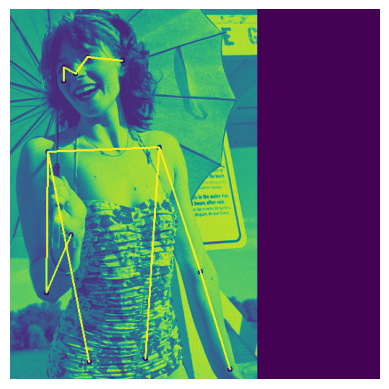

1-th sample:


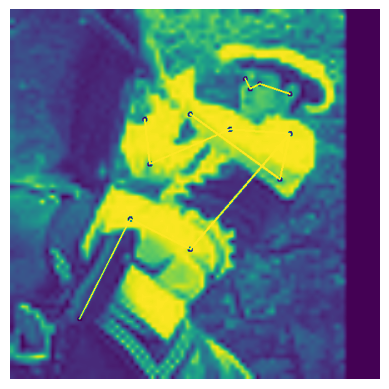

2-th sample:


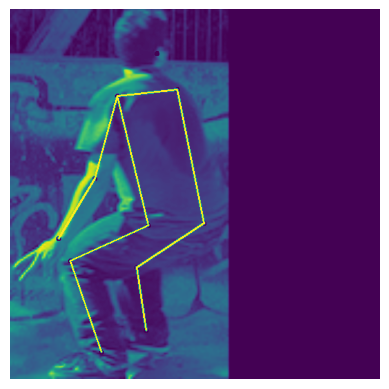

In [10]:
# just printing info

print('Info before converting data format:')
print(f'Image dimension:{timages.shape}')
for key in ttargets[0].keys():
    print(f'{key}: {ttargets[0][key].shape}')

print('\nInfo after converting data format:')
images_, targets_ = helpers.convert_data_format(timages, ttargets)
for i in range(len(images_)):
    print(f'{i}-th sample:')
    print(f'image size: {images_[i].shape}')
    for key in targets_[i].keys():
        print(f'{key}: {targets_[i][key].shape}')

print(f'\nShow {len(images_)} samples')
for i in range(len(images_)):
    print(f'{i}-th sample:')
    # annotate image with keypoints
    image_with_keypoints = helpers.draw_keypoints([targets_[i]], images_[i])
    # show the result
    plt.figure()
    plt.imshow(image_with_keypoints)
    plt.axis('off')
    plt.show()

In [11]:
model = keypointrcnn_resnet50_fpn(weights=Weights.DEFAULT, num_keypoints=17)

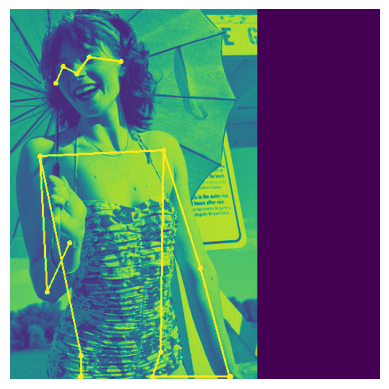

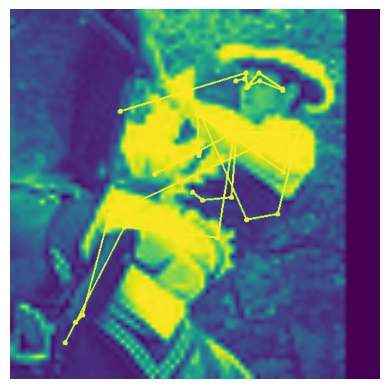

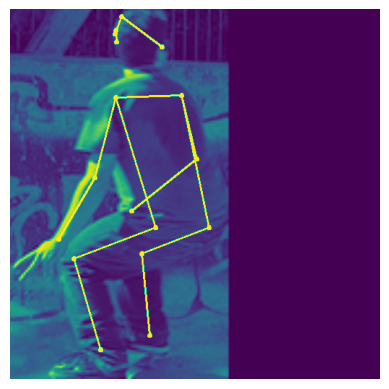

In [12]:
model.eval()
with torch.no_grad():
    outputs = model(images_)
# print info using results of keypointrcnn_resnet50_fpn model    
for i in range(len(images_)):
    # annotate image with keypoints
    image_with_keypoints = helpers.draw_keypoints([outputs[i]], images_[i])
    # show the result
    plt.figure()
    plt.imshow(image_with_keypoints)
    plt.axis('off')
    plt.show()